### Load the data

In [54]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
file_path = '/content/muni-pop-housing.xlsx'
df = pd.read_excel(file_path)

In [55]:
# Display the first few rows of the DataFrame
df.head()

,Vintage 2022 prepared October 2023.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,YEAR,COUNTY,PLACE,CFIPS,PFIPS,Total Population,Household Population,Group Quarters Population,Household Size,Total Housing Units,Occupied Housing Units,Vacant Housing Units,Vacancy Percent,Household Population to Total Housing Units Ratio
1,2010,Las Animas County,Aguilar,71,760,534,534,0,2.49,269,214,55,20.34,1.98513
2,2010,Washington County,Akron,121,925,1651,1467,184,2.22,815,660,155,18.98,1.8
3,2010,Alamosa County,Alamosa,3,1090,8796,8124,672,2.37,3675,3433,242,6.59,2.210612
4,2010,Park County,Alma,93,1530,271,271,0,2.2,169,123,46,26.98,1.60355


### Remove the incorrect header and correct it

In [56]:
# Set the correct header row and reload the dataset
df.columns = df.iloc[0]  # Set the first row as the header
df = df.drop(0).reset_index(drop=True)  # Remove the old header row

In [57]:
df.head()

,YEAR,COUNTY,PLACE,CFIPS,PFIPS,Total Population,Household Population,Group Quarters Population,Household Size,Total Housing Units,Occupied Housing Units,Vacant Housing Units,Vacancy Percent,Household Population to Total Housing Units Ratio
0,2010,Las Animas County,Aguilar,71,760,534,534,0,2.49,269,214,55,20.34,1.98513
1,2010,Washington County,Akron,121,925,1651,1467,184,2.22,815,660,155,18.98,1.8
2,2010,Alamosa County,Alamosa,3,1090,8796,8124,672,2.37,3675,3433,242,6.59,2.210612
3,2010,Park County,Alma,93,1530,271,271,0,2.2,169,123,46,26.98,1.60355
4,2010,Conejos County,Antonito,21,2355,783,782,1,2.46,375,318,57,15.23,2.085333


Here, the headers are corrected.

### Data Processing

In [58]:
# Rename the columns for better readability
df.columns = ['Year', 'County', 'Place', 'CFIPS', 'PFIPS', 'Total Population',
              'Household Population', 'Group Quarters Population', 'Household Size',
              'Total Housing Units', 'Occupied Housing Units', 'Vacant Housing Units',
              'Vacancy Percent', 'Household Pop to Housing Units Ratio']

Convert columns to numerical dtypes

In [59]:
# Convert numerical columns to appropriate types
numeric_columns = ['Year', 'CFIPS', 'PFIPS', 'Total Population', 'Household Population',
                   'Group Quarters Population', 'Household Size', 'Total Housing Units',
                   'Occupied Housing Units', 'Vacant Housing Units', 'Vacancy Percent',
                   'Household Pop to Housing Units Ratio']

# Convert to numeric types and handle conversion errors
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

Check for missing and duplicate values:

In [60]:
# Check the result and see if there are missing values or duplicates
df.isnull().sum()

,0
Year,0
County,0
Place,0
CFIPS,0
PFIPS,0
Total Population,0
Household Population,0
Group Quarters Population,0
Household Size,1071
Total Housing Units,0


In [61]:
df.duplicated().sum()

0

Therer are no duplicate values.

Handle missing values:

In [62]:
# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

Handle outliers using IQR:

In [63]:
# Detect outliers using IQR
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with outliers
df_cleaned = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

Get statistics of data:

In [64]:
selected_columns = ['Total Population', 'Household Population',
                   'Group Quarters Population', 'Household Size', 'Total Housing Units',
                   'Occupied Housing Units', 'Vacant Housing Units', 'Vacancy Percent',
                   'Household Pop to Housing Units Ratio']

# Get statistics for selected columns
statistics = df_cleaned[selected_columns].describe()

# Display the statistics
print(statistics)

       Total Population  Household Population  Group Quarters Population  \
count       2787.000000           2787.000000                 2787.00000   
mean        2064.450305           2047.712594                   16.73484   
std         2778.991774           2764.733001                   35.00101   
min            1.000000              1.000000                    0.00000   
25%          346.000000            339.500000                    0.00000   
50%          871.000000            871.000000                    0.00000   
75%         2540.500000           2520.000000                   14.50000   
max        17315.000000          17310.000000                  175.00000   

       Household Size  Total Housing Units  Occupied Housing Units  \
count     2787.000000          2787.000000             2787.000000   
mean         2.397765           942.400431              708.652314   
std          0.234486          1183.415181              765.955446   
min          1.800000             1

### Data Reduction - Pruning

In [65]:
# Drop irrelevant columns
irrelevant_columns = ['CFIPS', 'PFIPS','Household Pop to Housing Units Ratio','Group Quarters Population']
df_cleaned = df_cleaned.drop(columns=irrelevant_columns, errors='ignore')

df_cleaned.head()

,Year,County,Place,Total Population,Household Population,Household Size,Total Housing Units,Occupied Housing Units,Vacant Housing Units,Vacancy Percent
0,2010,Las Animas County,Aguilar,534,534,2.49,269,214.0,55.0,20.34
3,2010,Park County,Alma,271,271,2.20,169,123.0,46.0,26.98
4,2010,Conejos County,Antonito,783,782,2.46,375,318.0,57.0,15.23
5,2010,Lincoln County,Arriba,193,193,2.24,117,86.0,31.0,26.36
6,2010,Adams County,Arvada (Part),2857,2851,2.57,1151,1111.0,40.0,3.48


### Data Transformation -- Normalization

In [66]:
# Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler() #StandardScaler() #MinMaxScaler()

std_columns = ['Total Population', 'Household Population',
                    'Household Size', 'Total Housing Units',
                   'Occupied Housing Units', 'Vacant Housing Units']

df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[std_columns]), columns=std_columns)

# Concatenate unscaled columns ('Year', 'County', 'Place') with the scaled data
df_scaled = pd.concat([df_cleaned[["Year", "County", "Place"]], df_scaled], axis=1)

In [67]:
df_scaled.head()

,Year,County,Place,Total Population,Household Population,Household Size,Total Housing Units,Occupied Housing Units,Vacant Housing Units
0,2010.0,Las Animas County,Aguilar,0.030784,0.030793,0.584746,0.036246,0.049790,0.095321
3,2010.0,Park County,Alma,0.011089,0.011092,0.372881,0.015688,0.019869,0.053726
4,2010.0,Conejos County,Antonito,0.164953,0.164654,0.652542,0.155532,0.259467,0.069324
5,2010.0,Lincoln County,Arriba,0.087906,0.087931,0.703390,0.083040,0.135110,0.062392
6,2010.0,Adams County,Arvada (Part),0.008952,0.008955,0.881356,0.008520,0.012623,0.015598


### Data Similarity

In [68]:
# Check for redundant / higly correlated columns

duplicate_rows = df[df.duplicated()]
print(f'Number of duplicate rows: {duplicate_rows.shape[0]}')
df = df.drop_duplicates()  # Remove duplicate rows if any

Number of duplicate rows: 0


### Data

In [69]:
print(df_cleaned.columns)

df_cleaned.columns = df_cleaned.columns.str.strip()

Index(['Year', 'County', 'Place', 'Total Population', 'Household Population',
       'Household Size', 'Total Housing Units', 'Occupied Housing Units',
       'Vacant Housing Units', 'Vacancy Percent'],
      dtype='object')


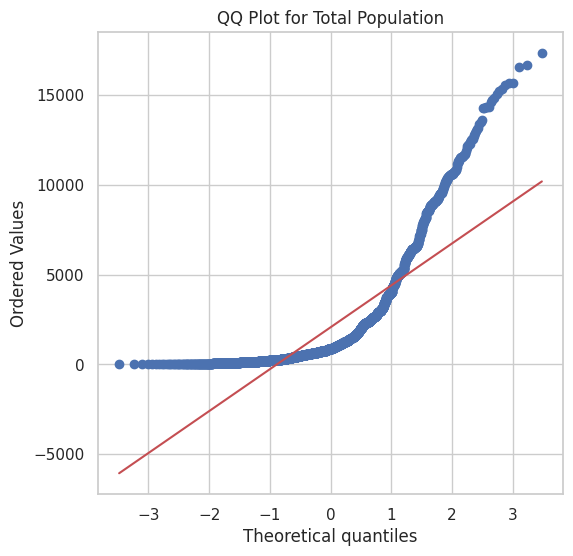

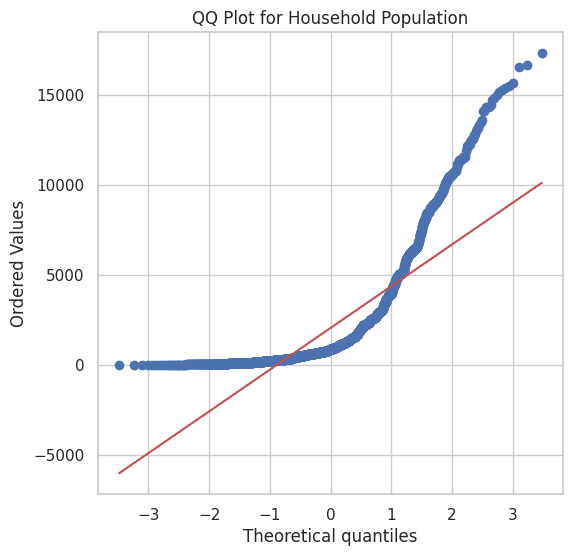

Column Group Quarters Population does not exist in the DataFrame.


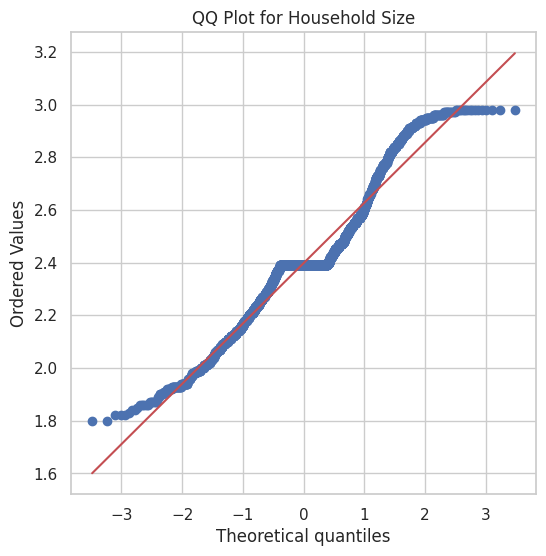

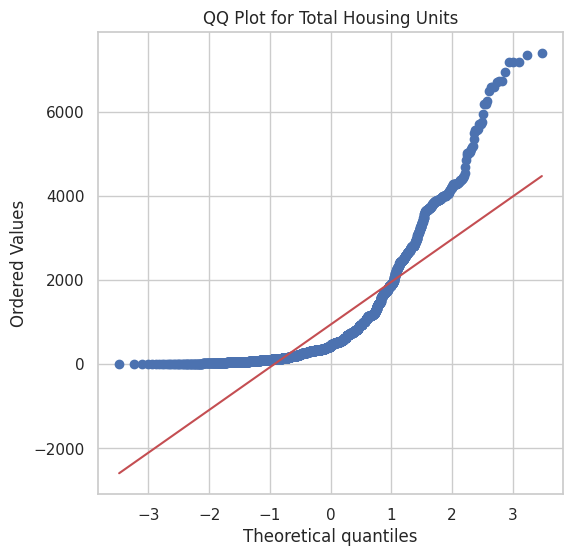

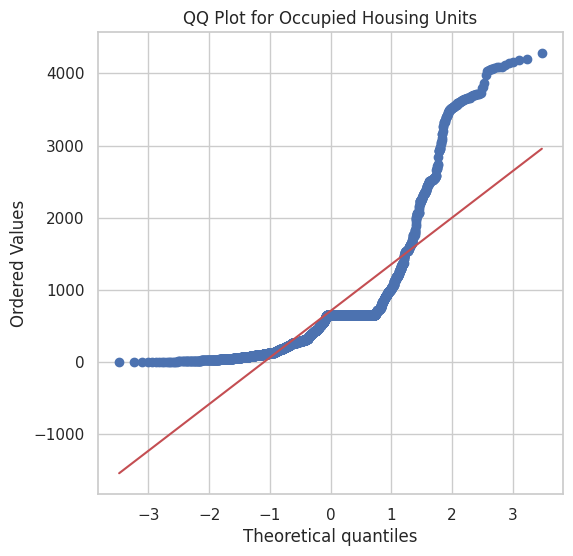

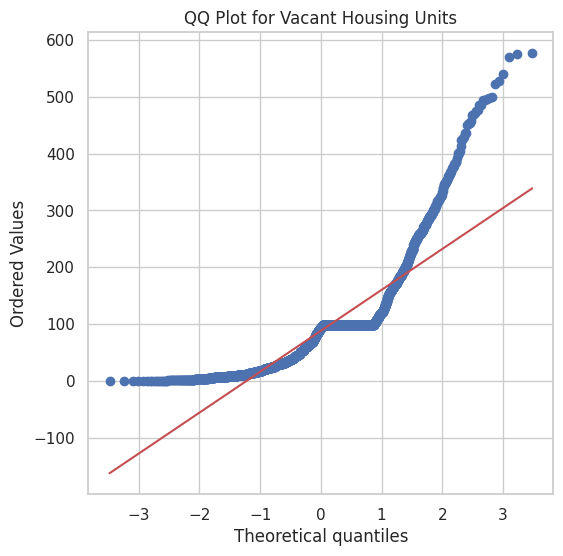

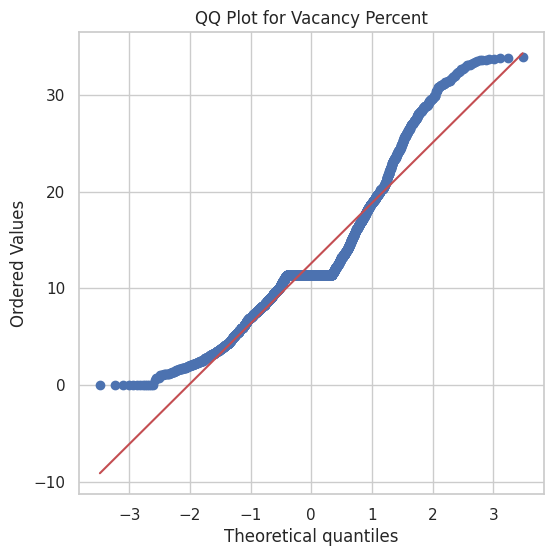

Column Household Pop to Housing Units Ratio does not exist in the DataFrame.


In [70]:
import matplotlib.pyplot as plt
import scipy.stats as stats

for column in selected_columns:
    if column in df_cleaned.columns:
        plt.figure(figsize=(6, 6))
        stats.probplot(df_cleaned[column], dist="norm", plot=plt)
        plt.title(f'QQ Plot for {column}')
        plt.show()
    else:
        print(f'Column {column} does not exist in the DataFrame.')

1. QQ Plot for Total Population

The upward curvature at the top right suggests that the distribution has a heavy right tail, indicating the presence of larger population values that are more extreme than what would be expected under a normal distribution.

The points are below the reference line on the left and above it on the right, which indicates positive skewness. In other words, there are more small population values and a few very large population values, creating an uneven distribution.

The points deviating significantly from the line at the top are the outliers, indicating areas with exceptionally high populations compared to the rest of the dataset.

2. QQ Plot for Household Population

The points deviate significantly from the straight red line, especially in the tails.
This indicates that the distribution of household population is heavily skewed or has heavier tails than a normal distribution.
It suggests that the data has outliers or is not symmetric.

3. QQ Plot for Household Size

This QQ plot shows a better alignment with the red line compared to the others, particularly in the middle range.
However, the deviations in the tails suggest some skewness or non-normality, but not as extreme as in the other variables.
The steps in the middle indicate a potential lack of smooth continuity in the data.

4. QQ Plot for Total Housing Units

Similar to the first plot, this one shows significant deviations from the straight line, indicating a non-normal distribution.
The right tail in particular suggests heavy positive skewness, with a number of values much larger than expected under normality.
The upward curve at the end suggests the presence of high-value outliers.

5. QQ Plot for Occupied Housing Units

The plot shows significant deviation from the red line (which represents a normal distribution), especially in the upper tail (large positive values). The data points appear to have a heavy right tail, suggesting that the distribution is heavily skewed to the right with a few very high values (outliers or extreme occupied units).

6. QQ Plot for Vacant Housing Units

Similarly, the QQ plot for vacant housing units also deviates from the line, especially in the right tail, though to a lesser degree than the first plot. This suggests that the distribution of vacant housing units is also right-skewed, but the data is slightly less extreme compared to occupied units.

7. QQ Plot for Vacancy Percentage

This plot shows less deviation from normality compared to the first two. Although there is still some skewness (mostly in the right tail), the data aligns more closely with the theoretical quantiles of a normal distribution. This suggests that the percentage of vacant units might follow a distribution closer to normal compared to the other two metrics.

### Inference

In [71]:
df.to_csv('clean_dataset.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4641 entries, 0 to 4640
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  4641 non-null   int64  
 1   County                                4641 non-null   object 
 2   Place                                 4641 non-null   object 
 3   CFIPS                                 4641 non-null   int64  
 4   PFIPS                                 4641 non-null   int64  
 5   Total Population                      4641 non-null   int64  
 6   Household Population                  4641 non-null   int64  
 7   Group Quarters Population             4641 non-null   int64  
 8   Household Size                        4641 non-null   float64
 9   Total Housing Units                   4641 non-null   int64  
 10  Occupied Housing Units                4641 non-null   float64
 11  Vacant Housing Un

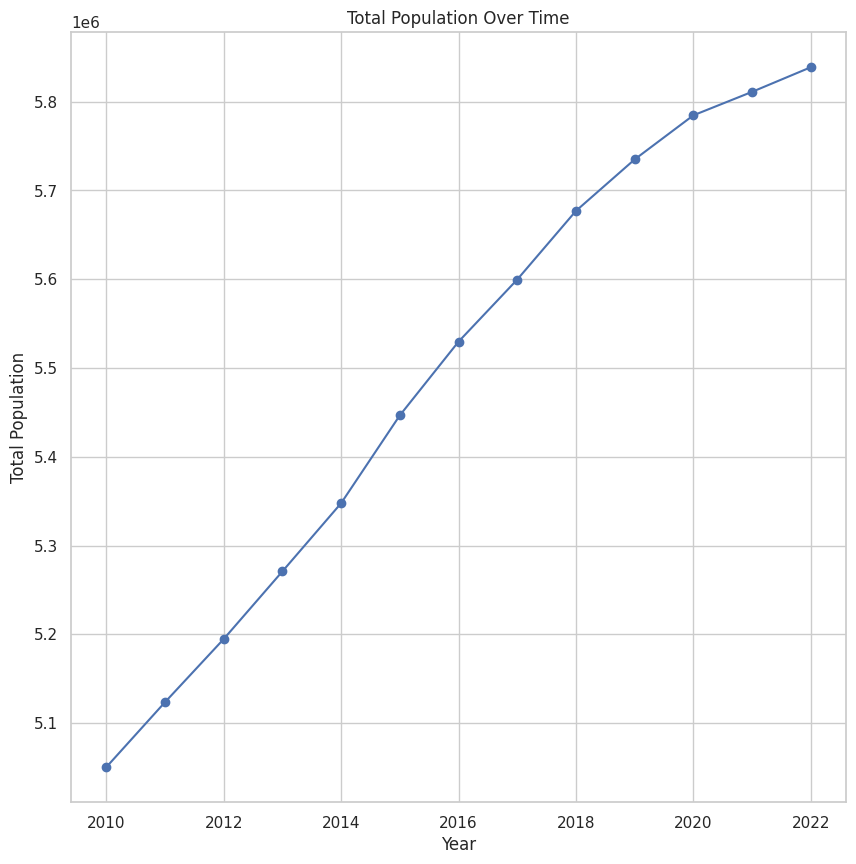

In [72]:
import pandas as pd

# Load the dataset
file_path = '/content/clean_dataset.csv'
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()

import matplotlib.pyplot as plt
import seaborn as sns

# plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))

# 1. Line Plot: Total Population over Time
df_grouped = df.groupby('Year')['Total Population'].sum().reset_index()
plt.plot(df_grouped['Year'], df_grouped['Total Population'], marker='o')
plt.title('Total Population Over Time')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.grid(True)
plt.show()

This plot shows how the total population changes across different years. There's a steady increase which suggests population growth. This could be due to several factors like people shifting over to Colorado from other states, be it for jobs or education, higher economic growth etc.

<Figure size 1500x1500 with 0 Axes>

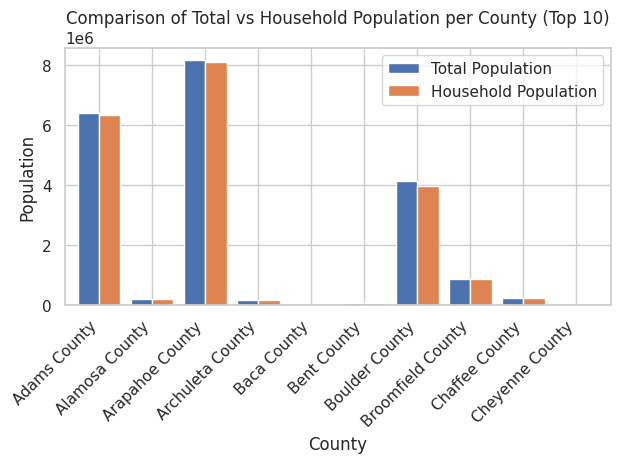

In [73]:
# 2. Bar Plot: Comparison of Total vs Household Population
# Group by County and sum the populations
df_county_pop = df.groupby('County')[['Total Population', 'Household Population']].sum().reset_index()

# Plot the data
plt.figure(figsize=(15, 15))
df_county_pop.set_index('County').head(10).plot(kind='bar', width=0.8)  # Show top 10 counties for clarity
plt.title('Comparison of Total vs Household Population per County (Top 10)')
plt.xlabel('County')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

This comparison reveals the proportion of the population living in households. A small difference between total and household population (such as in Alamosa County and Chaffee County) means that almost all the population resides in households. Larger differences (such as in Boulder county) indicates institutional or non-household living arrangements (e.g., hospitals, dorms).

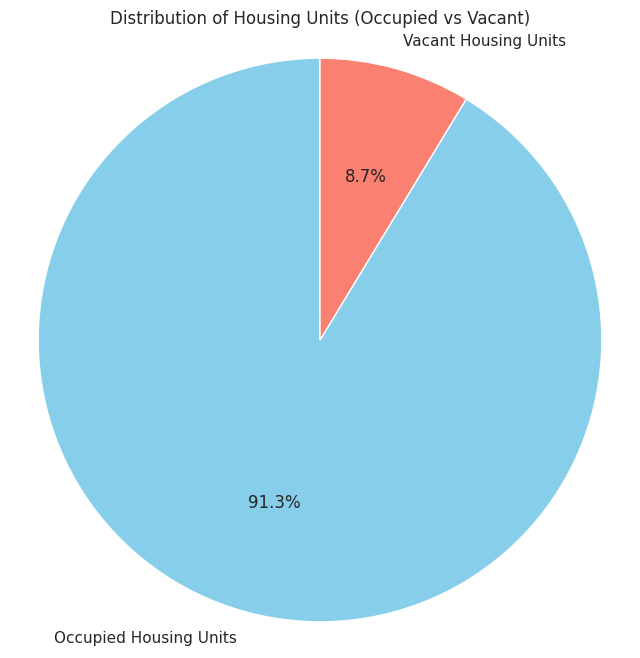

In [50]:
# 3.Pie Chart: Distribution of Housing Units (Occupied vs Vacant)
# Summing the total occupied and vacant housing units across all counties
housing_units = df[['Occupied Housing Units', 'Vacant Housing Units']].sum()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(housing_units, labels=housing_units.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Housing Units (Occupied vs Vacant)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This chart shows the ratio of occupied to vacant housing units. A higher proportion of occupied units suggests higher demand or population density. A smaller proportion of Vacant Housing units suggests that economic decline, housing surpluses, or migration out of the area is not very common.

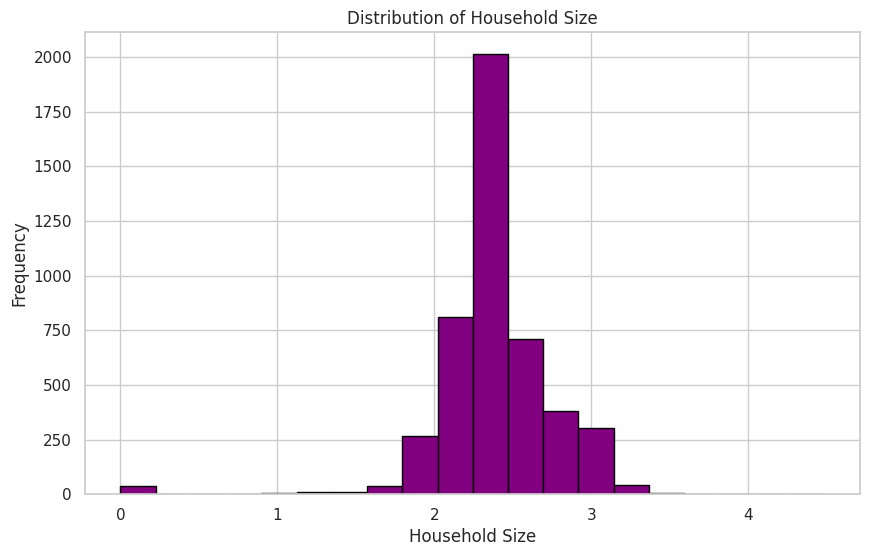

In [51]:
# 4. Histogram: Distribution of Household Size
plt.figure(figsize=(10, 6))
plt.hist(df['Household Size'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Household Size')
plt.xlabel('Household Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The histogram displays the most common household sizes. A peak at around 2-3 people suggests that smaller families or individuals are common. Larger household sizes indicate multigenerational living or communities where families tend to have more children, which is not common at all. Most of the families are about the size of 2 or 3.

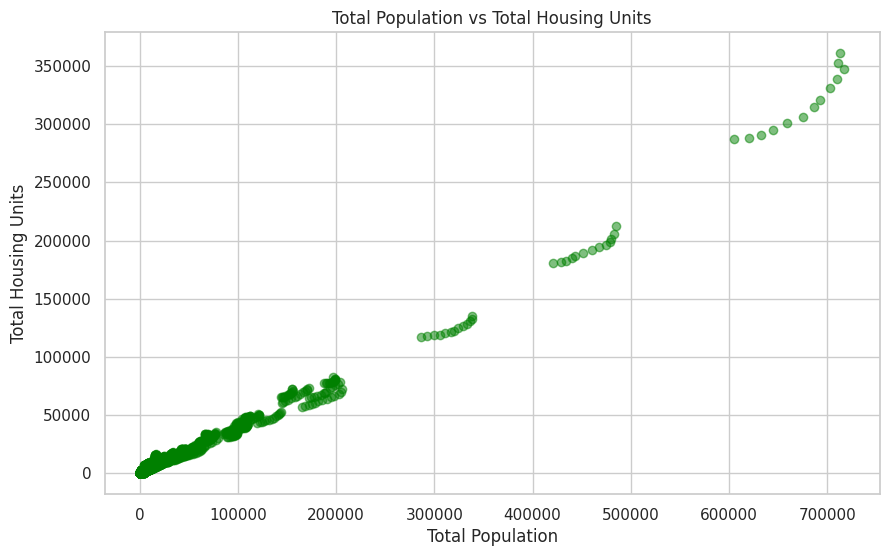

In [39]:
# 5. Scatter Plot: Total Population vs Total Housing Units
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Population'], df['Total Housing Units'], alpha=0.5, color='green')
plt.title('Total Population vs Total Housing Units')
plt.xlabel('Total Population')
plt.ylabel('Total Housing Units')
plt.grid(True)
plt.show()

This scatter plot helps visualize the relationship between the population size and the number of housing units. A positive correlation suggests that as the population increases, more housing is developed. Outliers indicate regions with housing shortages or surpluses.

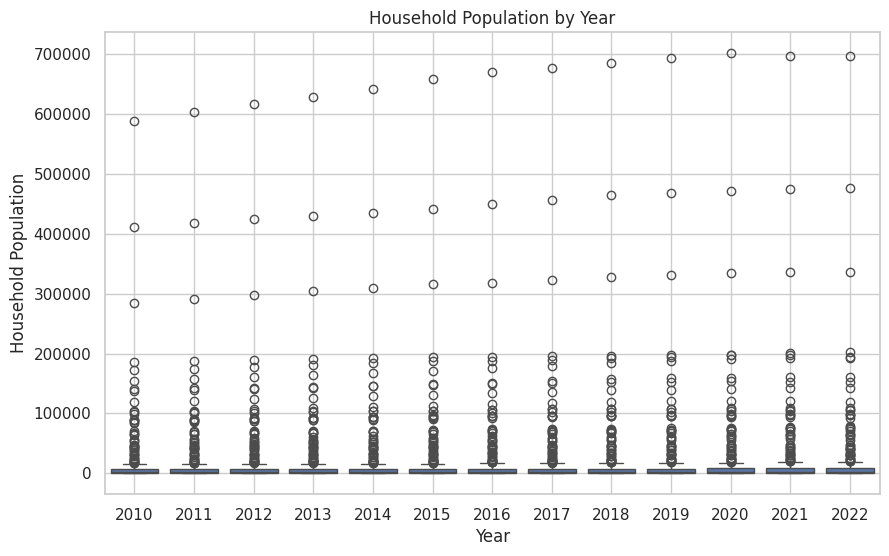

In [52]:
#6. Box Plot: Household Population by Year

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Household Population', data=df)
plt.title('Household Population by Year')
plt.xlabel('Year')
plt.ylabel('Household Population')
plt.grid(True)
plt.show()

This box plot shows the distribution of household populations for each year. Most household populations are tightly clustered near the lower end (below 100,000), with a few outliers reaching as high as 700,000. The pattern remains consistent across years, indicating that while most areas have relatively small household populations, a few outliers consistently push the upper limits. This suggests a small number of highly populated regions or cities driving the higher numbers.

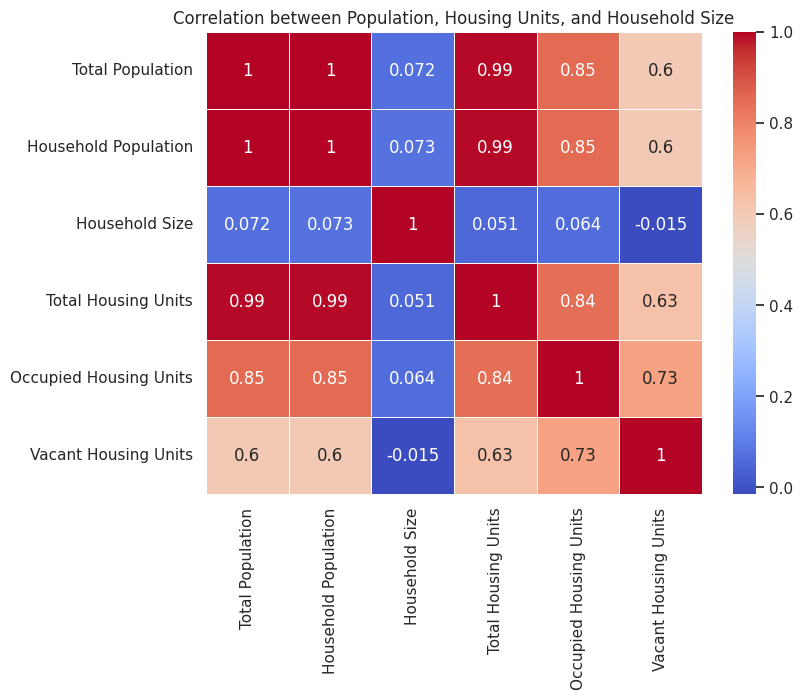

In [53]:
#7.Heatmap: Correlation between Population, Housing Units, and Household Size

plt.figure(figsize=(8, 6))
correlation = df[['Total Population', 'Household Population', 'Household Size', 'Total Housing Units',
                  'Occupied Housing Units', 'Vacant Housing Units']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Population, Housing Units, and Household Size')
plt.show()

Total Population and Total Housing Units are almost perfectly correlated (0.99), indicating that as the population increases, more housing units are built.

Household Population and Total Housing Units also have a very strong positive correlation (0.99), confirming that household populations drive housing demand.

Household Size has very low correlations with most other factors, suggesting that changes in household size do not significantly influence the total or household population.

Occupied Housing Units have a strong positive correlation with both Total Population (0.85) and Household Population (0.85), implying that most housing units are occupied by the population in the dataset.

Vacant Housing Units show a moderate positive correlation with Total Population (0.6) and Household Population (0.6), indicating that as populations rise, the number of vacant units may also increase, though to a lesser extent than occupied units.

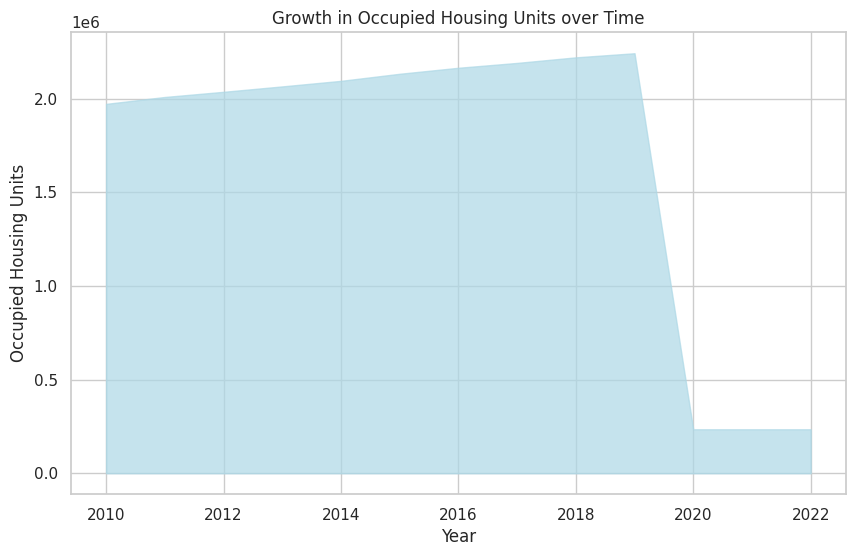

In [42]:
#8.Area Plot: Growth in Occupied Housing Units over Time

df_grouped_housing = df.groupby('Year')['Occupied Housing Units'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.fill_between(df_grouped_housing['Year'], df_grouped_housing['Occupied Housing Units'], color='lightblue', alpha=0.7)
plt.title('Growth in Occupied Housing Units over Time')
plt.xlabel('Year')
plt.ylabel('Occupied Housing Units')
plt.grid(True)
plt.show()


This plot shows the growth and decline of occupied housing units over time. The area plot steadily rises suggesting more people are moving into occupied homes, indicating growth. A plateau or decline at the end points to economic stagnation or population migration away from the area.

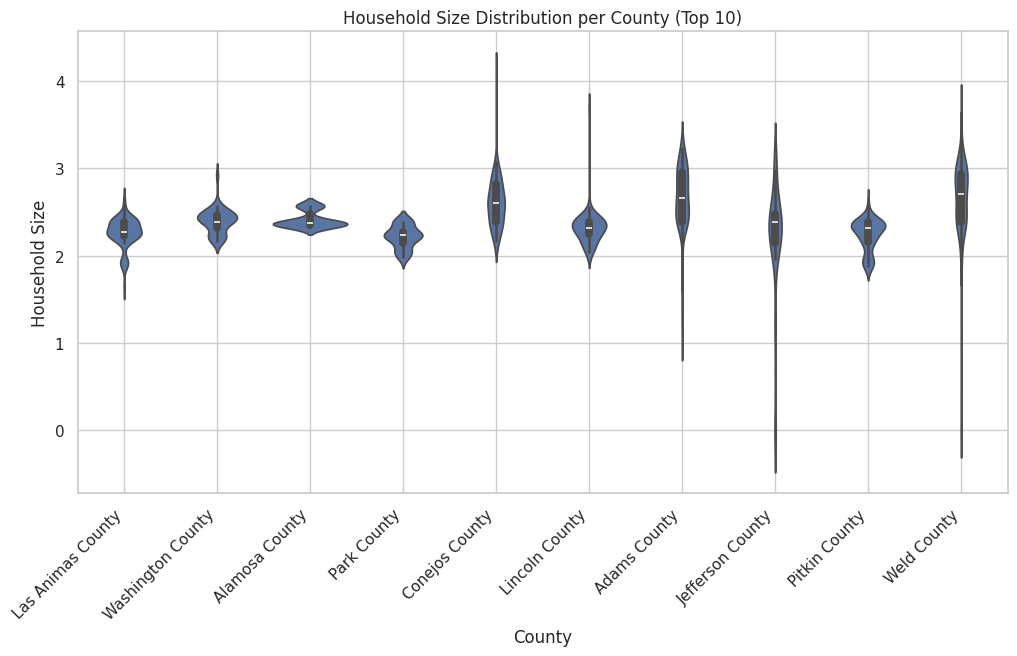

In [43]:
#9.Violin Plot: Household Size Distribution per County

plt.figure(figsize=(12, 6))
sns.violinplot(x='County', y='Household Size', data=df[df['County'].isin(df['County'].unique()[:10])])  # Limiting to top 10 counties
plt.title('Household Size Distribution per County (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


The violin plot displays the distribution of household sizes across the top 10 counties.
Counties like Jefferson and Adams show a more concentrated household size distribution around the median, indicating consistency in household size within these counties.
Counties such as Park and Pitkin display more variability in household size, suggesting a mix of both smaller and larger households.
The wider distribution in some counties indicates the presence of more diverse living arrangements or mixed household compositions.


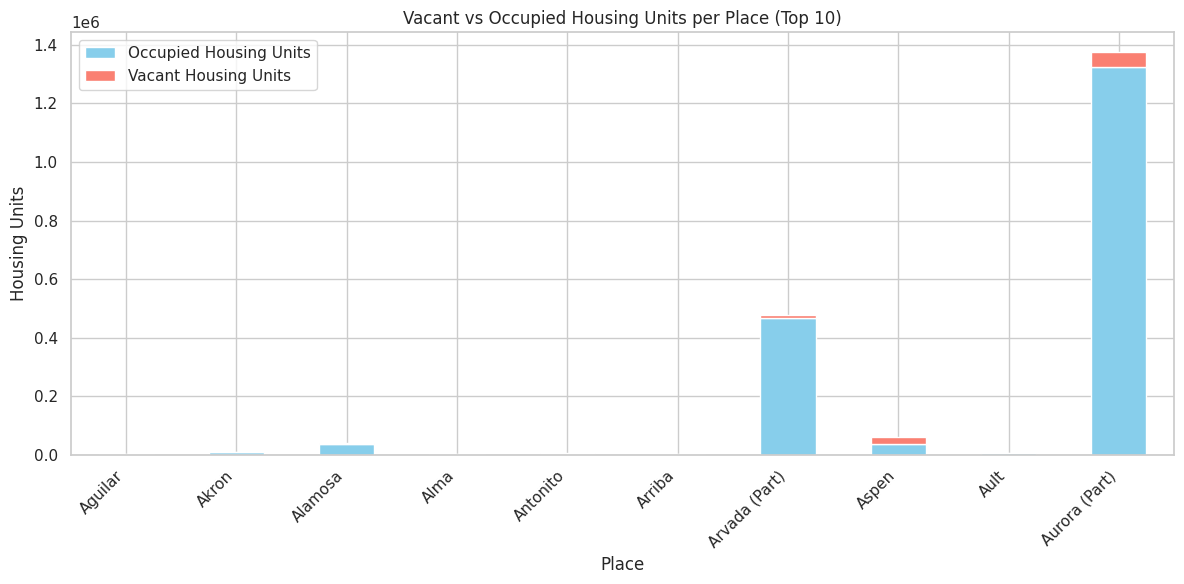

In [44]:
#10. Stacked Bar Plot: Vacant vs Occupied Housing Units per Place

df_place_housing = df.groupby('Place')[['Occupied Housing Units', 'Vacant Housing Units']].sum().reset_index()

# Plot the data for top 10 places
df_top_places = df_place_housing.head(10).set_index('Place')
df_top_places.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Vacant vs Occupied Housing Units per Place (Top 10)')
plt.xlabel('Place')
plt.ylabel('Housing Units')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


This bar plot compares vacant and occupied housing units across various places.
Aurora (Part) has the highest number of occupied housing units, reflecting significant residential activity or growth.

Places like Arvada (Part) and Aspen also show considerable numbers of occupied housing units, though they have relatively lower vacancy rates, indicating a higher occupancy or demand for housing.

Most smaller places, such as Aguilar, Akron, and Alma, have very few housing units overall, suggesting limited residential development or lower population density.

The differences in vacancy rates could point to varying economic conditions, housing market demand, or urbanization levels across these locations.